<a href="https://colab.research.google.com/github/Kknorth51/HomeWork/blob/main/Stat_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Линейная регрессия. Логистическая регрессия**

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

R=0.7876


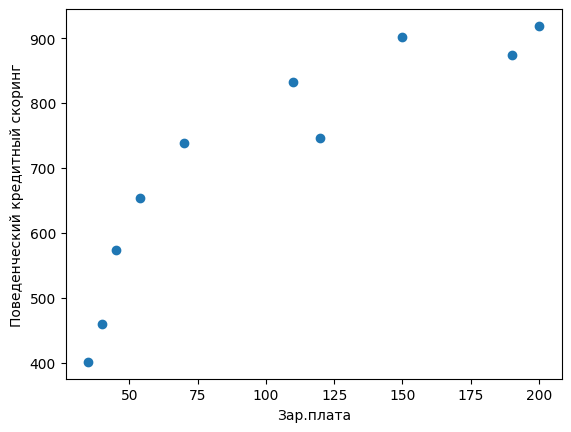

In [7]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
R = np.corrcoef(zp,ks)[0, 1]**2
print(f'{R=:.4f}')
plt.scatter(zp, ks)
plt.xlabel('Зар.плата')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

Коэффициент детерминации равен R=0.7876 и график говорит о линейной зависимости. Рассчёт коэффицентов:

In [3]:
def get_b1(x, y):
    return (np.mean(x*y) - np.mean(x)*np.mean(y)) /(np.mean(x**2) - np.mean(x)**2)

def get_b0(x, y, b_1):
    return np.mean(y) - b_1 * np.mean(x)

b1 = get_b1(zp, ks)
b0 = get_b0(zp, ks, b1)

print(f'{b0=:.3f}\t{b1=:.3f}')

b0=444.177	b1=2.621


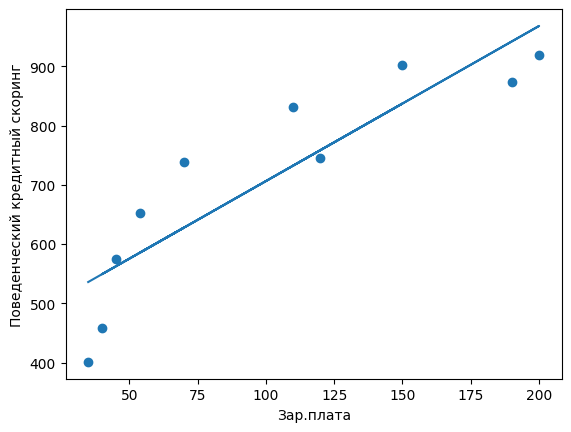

In [6]:
plt.scatter(zp,ks)
plt.plot(zp, b0 + b1*zp)
plt.xlabel('Зар.плата')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

**без intercept**

In [8]:
b = (np.sum(zp*ks))/(np.sum(zp**2))
print(f'{b=:.4f}')

b=5.8898


In [9]:
def mse_(B1, x, y, n):
    return np.sum((B1*x -y)**2)/n

alpha = 1e-6
b_1 = 0.1
n = len(zp)

for i in range(10**6):
    b_1 -= alpha * (2/n) * np.sum((b_1*zp -ks)*zp)
    if not i % 10**5:
        print(f'Итерация {i}: {b_1=}\tmse={mse_(b_1, zp, ks, n)}')

Итерация 0: b_1=0.25952808	mse=493237.7212546963
Итерация 100000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 200000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 300000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 400000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 500000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 600000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 700000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 800000: b_1=5.889820420132673	mse=56516.85841571943
Итерация 900000: b_1=5.889820420132673	mse=56516.85841571943


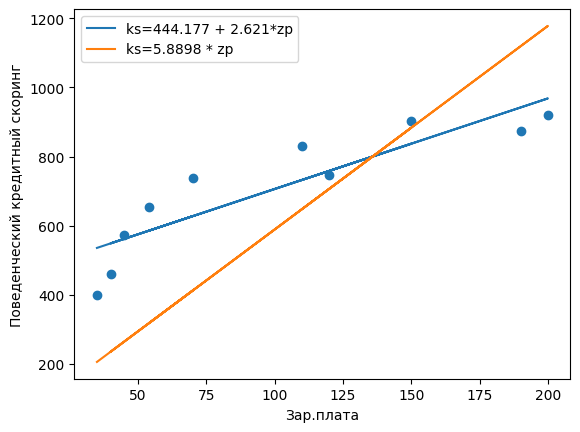

In [10]:
plt.scatter(zp,ks)
plt.plot(zp, (b0 + b1*zp), label='ks=444.177 + 2.621*zp')
plt.plot(zp, b_1*zp, label='ks=5.8898 * zp')
plt.xlabel('Зар.плата')
plt.ylabel('Поведенческий кредитный скоринг')
plt.legend()
plt.show()

**с intercept**

In [11]:
def mse_2(B0, B1, x, y, n):
    return np.sum((B0 + B1*x) - y)**2/n

alpha = 3e-5
B0 = 0.1
B1 = 0.1
n = len(zp)

for i in range(10**6*2):
    B0 -= alpha * (2/n) * np.sum((B0 + B1*zp) - ks)
    B1 -= alpha * (2/n) * np.sum(((B0 + B1*zp) - ks)*zp)
    if not i % (10**5):
        print(f'Итерация {i}: {B0=}\t{B1=}\tmse={mse_2(B0, B1, zp, ks, n)}')

Итерация 0: B0=0.14197959999999998	B1=4.884978596113599	mse=459764.4704439803
Итерация 100000: B0=347.2559075176058	B1=3.3339127474648516	mse=6044.389374801858
Итерация 200000: B0=423.0215571081485	B1=2.7762525556795365	mse=287.98611149633325
Итерация 300000: B0=439.5595159313502	B1=2.6545277194387675	mse=13.721154490887102
Итерация 400000: B0=443.16938509390076	B1=2.6279578907579992	mse=0.6537470837952486
Итерация 500000: B0=443.95733936988626	B1=2.622158287177236	mse=0.03114790740473789
Итерация 600000: B0=444.12933229069927	B1=2.6208923625039224	mse=0.0014840481280531102
Итерация 700000: B0=444.1668745259701	B1=2.6206160392593607	mse=7.070776277765254e-05
Итерация 800000: B0=444.17506916225733	B1=2.620555724031177	mse=3.3688851553905513e-06
Итерация 900000: B0=444.1768578693843	B1=2.620542558556257	mse=1.6051119084652208e-07
Итерация 1000000: B0=444.1772483044262	B1=2.6205396848254634	mse=7.647587493276255e-09
Итерация 1100000: B0=444.1773335277289	B1=2.620539057553823	mse=3.6437080

Рассчитаем с помощью функции в Python для построения линейной регрессии

In [12]:
zp = zp.reshape(len(zp), 1)
model = LinearRegression()
model.fit(zp, ks)
R = model.score(zp, ks)
b0 = model.intercept_
b1 = model.coef_[0]
print(f'{R=:.4f}\t{b0=:.3f}\t{b1=:.3f}')

R=0.7876	b0=444.177	b1=2.621


Расчёты по математическим формулам, методу градиентного спуска и по функциям Python совпадают.

Оценка значимости полученной математической модели с помощью критерия Фишера

In [14]:
ks_pred = model.predict(zp)
rest = ks - ks_pred
data = pd.DataFrame({'Реальные данные': ks, 'Предсказанные данные': ks_pred, 'Остаток': rest})
data

,Реальные данные,Предсказанные данные,Остаток
0,401,535.896218,-134.896218
1,574,562.101607,11.898393
2,874,942.079745,-68.079745
3,919,968.285134,-49.285134
4,459,548.998913,-89.998913
5,739,627.615079,111.384921
6,653,585.686457,67.313543
7,902,837.258190,64.741810
8,746,758.642023,-12.642023
9,832,732.436634,99.563366


In [15]:
stats.shapiro(rest)

ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)

In [16]:
F_table = stats.f.ppf(0.95, 1, len(zp) - 2)
F = np.sum((ks_pred - np.mean(zp))**2)/(np.sum(rest**2)/(len(zp)-2))
print(f'{F_table=:.5f}\t{F=:.5f}')
if F > F_table:
    print('Математическая модель ks_pred = 447.177 + 2.621 * zp - статистически значима.')
else:
    print('Матиматическая модель ks_pred = 447.177 + 2.621 * zp - статистически незначима')

F_table=5.31766	F=487.47510
Математическая модель ks_pred = 447.177 + 2.621 * zp - статистически значима.
